# Deep Learning - Predicting Diabetes Progression using Artificial Neural Networks
To model the progression of diabetes using the available independent variables. This model will help healthcare professionals understand how different factors influence the progression of diabetes and potentially aid in designing better treatment plans and preventive measures. The model will provide insights into the dynamics of diabetes progression in patients.


## **1.Loading and Preprocessing**

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

diabetes_data = load_diabetes()        # Load the Diabetes dataset
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = pd.Series(diabetes_data.target)

In [13]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [14]:
X.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [16]:
X.size

4420

In [17]:
X.shape

(442, 10)

In [18]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [19]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


## **2.Exploratory Data Analysis**

In [20]:
print(X.isnull().sum())   # Checking for null values

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)     # Normalising the features

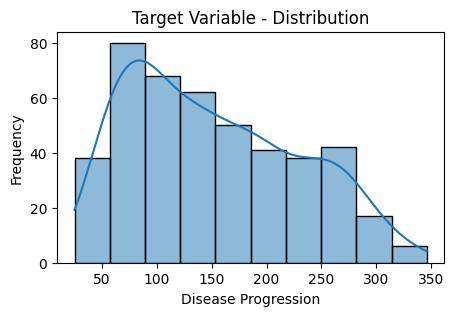

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))     # Distribution of target variable
sns.histplot(y, kde=True)
plt.title('Target Variable - Distribution')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.show()

### Insights from Histplot is as follows:
**Right-Skewed Distribution:**
The data is concentrated on the left side, indicating that most patients have lower disease progression values. The frequency decreases as the disease progression value increases.ommon.

**Frequency Peaks:** 
The highest frequency of disease progression values is around the lower end of the scale, suggesting that a significant number of patients have mild disease progression.

**Outliers:**
There are fewer instances of high disease progression, which could be outliers or rare cases.

**Trend Line:** 
The overlaying line graph, likely representing a probability distribution, follows the same right-skewed pattern, reinforcing the observation that lower disease progression values are more common.

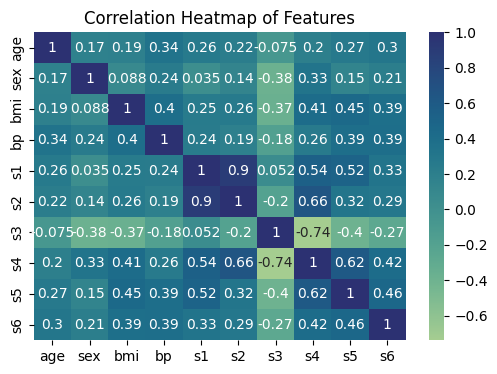

In [23]:
plt.figure(figsize=(6,4))
correlation_matrix = pd.DataFrame(X_scaled, columns=diabetes_data.feature_names).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation Heatmap of Features')
plt.show()

### **Insights from correlation heatmap**

Strong Positive Correlation
: s3 and s4: These features have a strong positive correlation, indicating that as one increases, the other tends to increase as well
. bmi and bp: These features also show a strong positive correlation, suggesting a relationship between body mass index and blood pressur.

Strong Negative Correlati 
ns: bmi and s2: There’s a strong negative correlation here, meaning that as BMI increases, the value of s2 tends to decrease.

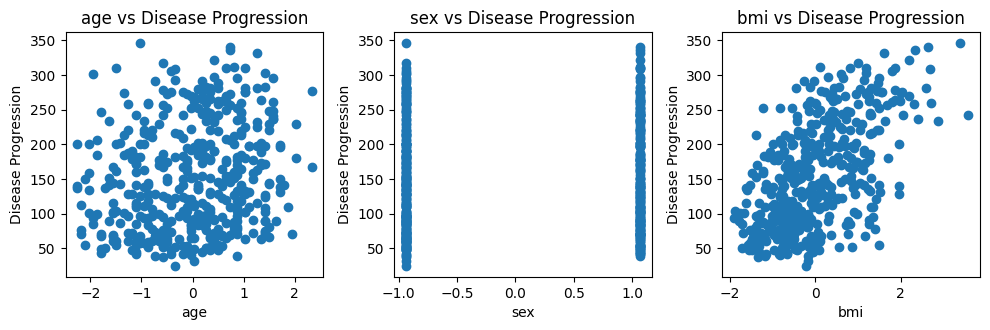

In [24]:
plt.figure(figsize=(10, 6))   # Scatter plot of a few features vs target
for i, feature in enumerate(diabetes_data.feature_names[:3]):  # Visualizing only first 3 for brevity
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_scaled[:, i], y)
    plt.title(f'{feature} vs Disease Progression')
    plt.xlabel(feature)
    plt.ylabel('Disease Progression')
plt.tight_layout()
plt.show()

Age vs Disease Progression: There appears to be a slight positive correlation between age and disease progression, indicating that older individuals might experience higher disease progression.

Sex vs Disease Progression: The data points are spread out, suggesting no clear correlation between sex and disease progression. This implies that disease progression is relatively independent of sex.

BMI vs Disease Progression: There seems to be a moderate positive correlation between BMI and disease progression. Higher BMI values are associated with higher disease progression, indicating that body mass index could be a significant factor in disease progression.

## **3.Building the ANN Model**

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Building the ANN model
model = models.Sequential([
    layers.InputLayer(input_shape=(X_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression (no activation function)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

## **4.Training the ANN Model**

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 31056.8867 - mean_squared_error: 31056.8867 - val_loss: 22326.4219 - val_mean_squared_error: 22326.4219
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31580.5391 - mean_squared_error: 31580.5391 - val_loss: 22148.3906 - val_mean_squared_error: 22148.3906
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 29548.6113 - mean_squared_error: 29548.6113 - val_loss: 21944.3262 - val_mean_squared_error: 21944.3262
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29060.4863 - mean_squared_error: 29060.4863 - val_loss: 21700.2754 - val_mean_squared_error: 21700.2754
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31188.7715 - mean_squared_error: 31188.7715 - val_loss: 21403.0273 - val_mean_squared_error: 21403.0273
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31922.8906 - mean_squared_error: 31922.8906 - val_loss: 21040.8066 - val_mean_squared_error: 21040.8066
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━

## **5.Evaluating the Model**

In [27]:
# Evaluate the model on the testing data
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MSE: {test_mse}')

# Calculating R² Score
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Test MSE: 3007.37158203125
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
R² Score: 0.4323734765194408


## **6.Improving the Model**

In [28]:
# Experiment with a different architecture or hyperparameters
# Example: Adding more layers and changing the activation function
model_improved = models.Sequential([
    layers.InputLayer(input_shape=(X_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model_improved.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
# Train the improved model
history_improved = model_improved.fit(X_train, y_train, epochs=150, validation_split=0.2, batch_size=32, verbose=2)

Epoch 1/150
9/9 - 2s - 260ms/step - loss: 31307.7344 - mean_squared_error: 31307.7344 - val_loss: 22155.6582 - val_mean_squared_error: 22155.6582
Epoch 2/150
9/9 - 0s - 13ms/step - loss: 30877.2129 - mean_squared_error: 30877.2129 - val_loss: 21710.2051 - val_mean_squared_error: 21710.2051
Epoch 3/150
9/9 - 0s - 13ms/step - loss: 30105.8301 - mean_squared_error: 30105.8301 - val_loss: 20913.8262 - val_mean_squared_error: 20913.8262
Epoch 4/150
9/9 - 0s - 19ms/step - loss: 28736.7598 - mean_squared_error: 28736.7598 - val_loss: 19518.2422 - val_mean_squared_error: 19518.2422
Epoch 5/150
9/9 - 0s - 13ms/step - loss: 26232.2227 - mean_squared_error: 26232.2227 - val_loss: 17250.1406 - val_mean_squared_error: 17250.1406
Epoch 6/150
9/9 - 0s - 14ms/step - loss: 22289.7207 - mean_squared_error: 22289.7207 - val_loss: 13934.9326 - val_mean_squared_error: 13934.9326
Epoch 7/150
9/9 - 0s - 13ms/step - loss: 16966.8633 - mean_squared_error: 16966.8633 - val_loss: 9812.4062 - val_mean_squared_err

In [29]:
# Evaluate the improved model
test_loss_improved, test_mse_improved = model_improved.evaluate(X_test, y_test, verbose=0)
y_pred_improved = model_improved.predict(X_test)
r2_improved = r2_score(y_test, y_pred_improved)

print(f'Improved Test MSE: {test_mse_improved}')
print(f'Improved R² Score: {r2_improved}')

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000025FDEDCAB60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Improved Test MSE: 2843.288330078125
Improved R² Score: 0.46334335703629237


Architecture Changes: Added more layers and neurons in the improved model to potentially capture more complex patterns.
Performance Comparison: Compare the original and improved model's performance to determine if the changes led to better results.